In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [2]:
training_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)

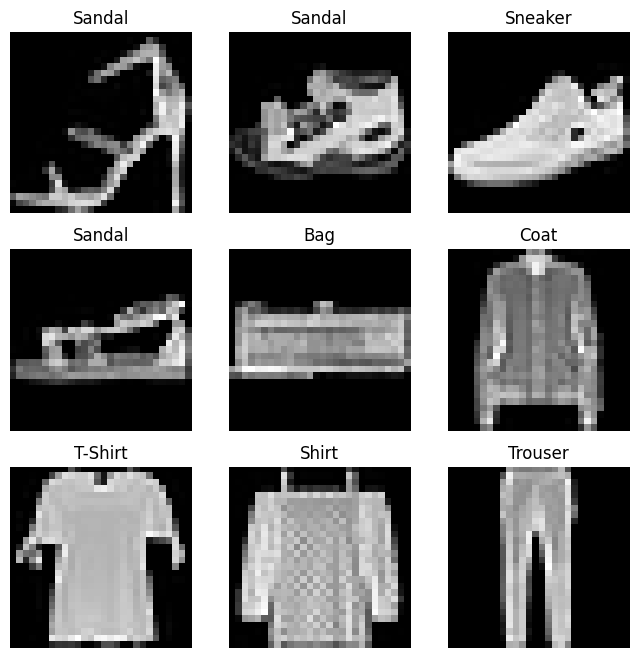

In [3]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8,8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1, )).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [4]:
import os 
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [5]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


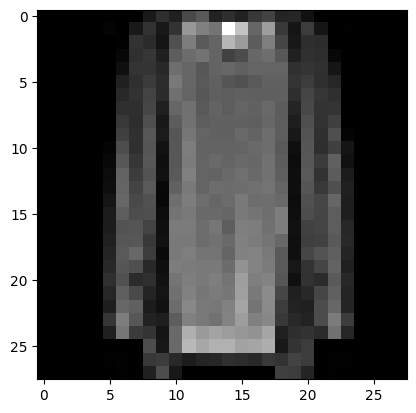

Label: 2


In [6]:
# Display the image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f'Feature batch shape: {train_features.size()}')
print(f'Labels batch shape: {train_labels.size()}')
img = train_features[0]
label = train_labels[0]
plt.imshow(img.squeeze(), cmap='gray')
plt.show()
print(f'Label: {label}')

In [ ]:
# add artificial noise.
# random noise from normal distribution with mean at 0 and std dev of 1.
noise_factor = 0.5


In [15]:
import torch.nn as nn

class SimpleAutoEncoder(nn.Module):
    def __init__(self):
        # N, 784
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128), # N, 784 -> N, 128
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(), 
            nn.Linear(64, 12),
            nn.ReLU(),
            nn.Linear(12, 3) # N, 3
        )

        self.encoder = nn.Sequential(
            nn.Linear(3, 12), 
            nn.ReLU(),
            nn.Linear(12, 64),
            nn.ReLU(), 
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid() # N, 3 -> N, 728
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# note: [-1, 1] -> nn.Tanh
        

In [17]:
model = SimpleAutoEncoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

In [18]:
num_epochs = 1
outputs = []
def train():
    for epoch in range(num_epochs):
        for (image, _) in dataloader:
            img = img.reshape(-1, 28*28)
            recon = model(img)
            loss = criterion(recon, img)
    
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')
        outputs.append((epoch, img, recon))

In [ ]:
for k in range(0, num_epochs, 4):
    plt.figure(figsize=(9,2))
    plt.gray()
    imgs = outputs[k][1].detach().numpy()
    recon = outputs[k][2].detach().numpy()
    for i, item in enumerate(imgs):
        if i >= 9: 
            break
        plt.subplot(2, 9, i+1)
        item = item.reshape(-1, 28, 28)
        plt.imshow(item[0])
    for i, item in enumerate(recon):
        if i >= 9:
            break
        plt.subplot(2, 9, 9+i+1)
        item = item.reshape(-1, 28, 28)
        plt.imshow(item[0])

input tensor : $[batch size,channels,height,width]$  
filter tensor : $[1, 1, 3, 3]$  
output tensor (after convolution) : $[batch size,channels,height,width]$  

In [2]:
import torch
import torch.nn.functional as F

# Define a simple 1-channel 4x4 input tensor
input_tensor = torch.tensor([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16]
], dtype=torch.float32).unsqueeze(0).unsqueeze(0)  # Adding batch and channel dimensions

# Define a 3x3 filter
filter_tensor = torch.tensor([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
], dtype=torch.float32).unsqueeze(0).unsqueeze(0)  # Adding input and output channel dimensions

input_tensor.shape, input_tensor, filter_tensor.shape, filter_tensor

(torch.Size([1, 1, 4, 4]),
 tensor([[[[ 1.,  2.,  3.,  4.],
           [ 5.,  6.,  7.,  8.],
           [ 9., 10., 11., 12.],
           [13., 14., 15., 16.]]]]),
 torch.Size([1, 1, 3, 3]),
 tensor([[[[ 1.,  0., -1.],
           [ 1.,  0., -1.],
           [ 1.,  0., -1.]]]]))

In [3]:
# Apply convolution
convolution_result = F.conv2d(input_tensor, filter_tensor, padding=1)

convolution_result.shape, convolution_result

(torch.Size([1, 1, 4, 4]),
 tensor([[[[ -8.,  -4.,  -4.,  10.],
           [-18.,  -6.,  -6.,  21.],
           [-30.,  -6.,  -6.,  33.],
           [-24.,  -4.,  -4.,  26.]]]]))

In [4]:
maxpool_result = F.max_pool2d(convolution_result, kernel_size=(2, 2))

maxpool_result.shape, maxpool_result

(torch.Size([1, 1, 2, 2]),
 tensor([[[[-4., 21.],
           [-4., 33.]]]]))

In [7]:
upsample_result = F.interpolate(maxpool_result, scale_factor=2, mode='nearest')

upsample_result.shape, upsample_result

(torch.Size([1, 1, 4, 4]),
 tensor([[[[-4., -4., 21., 21.],
           [-4., -4., 21., 21.],
           [-4., -4., 33., 33.],
           [-4., -4., 33., 33.]]]]))